In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
mp_key = "bsvkvKtIeOMa1amMu5ZlNLCEpRMHPSeb"
mp_id = "mp-505297"

In [3]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
xrd = XRDCalculator("CuKa1")
pattern = xrd.get_pattern(prim_struc)

In [5]:
print("Premier pic pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å")
print("Angle 2Θ entre les 2 rayons :", pattern.x[0])
print("Intensité du premier pic :", pattern.y[0])
print("Indices hkl associés :", pattern.hkls[0])
print("Distance associée :", pattern.d_hkls[0])

Premier pic pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å
Angle 2Θ entre les 2 rayons : 24.952524599302127
Intensité du premier pic : 43.08315188139068
Indices hkl associés : [{'hkl': (1, 0, 0), 'multiplicity': 6}, {'hkl': (1, 1, 1), 'multiplicity': 2}]
Distance associée : 3.5655314657157904


In [6]:
print("Deuxième pic pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å")
print("Angle 2Θ entre les 2 rayons :", pattern.x[1])
print("Intensité du premier pic :", pattern.y[1])
print("Indices hkl associés :", pattern.hkls[1])
print("Distance associée :", pattern.d_hkls[1])

Deuxième pic pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å
Angle 2Θ entre les 2 rayons : 28.890634556538263
Intensité du premier pic : 25.10745772469482
Indices hkl associés : [{'hkl': (1, 1, 0), 'multiplicity': 6}]
Distance associée : 3.087840421453466


In [7]:
print("Troisième pic pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å")
print("Angle 2Θ entre les 2 rayons :", pattern.x[2])
print("Intensité du premier pic :", pattern.y[2])
print("Indices hkl associés :", pattern.hkls[2])
print("Distance associée :", pattern.d_hkls[2])

Troisième pic pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å
Angle 2Θ entre les 2 rayons : 41.315368491838164
Intensité du premier pic : 99.99999999999999
Indices hkl associés : [{'hkl': (1, 0, -1), 'multiplicity': 6}, {'hkl': (1, 1, 2), 'multiplicity': 2}]
Distance associée : 2.1834331228666004


Intensité des trois premiers pics en fonction des angles pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å


AttributeError: 'Axes' object has no attribute 'show'

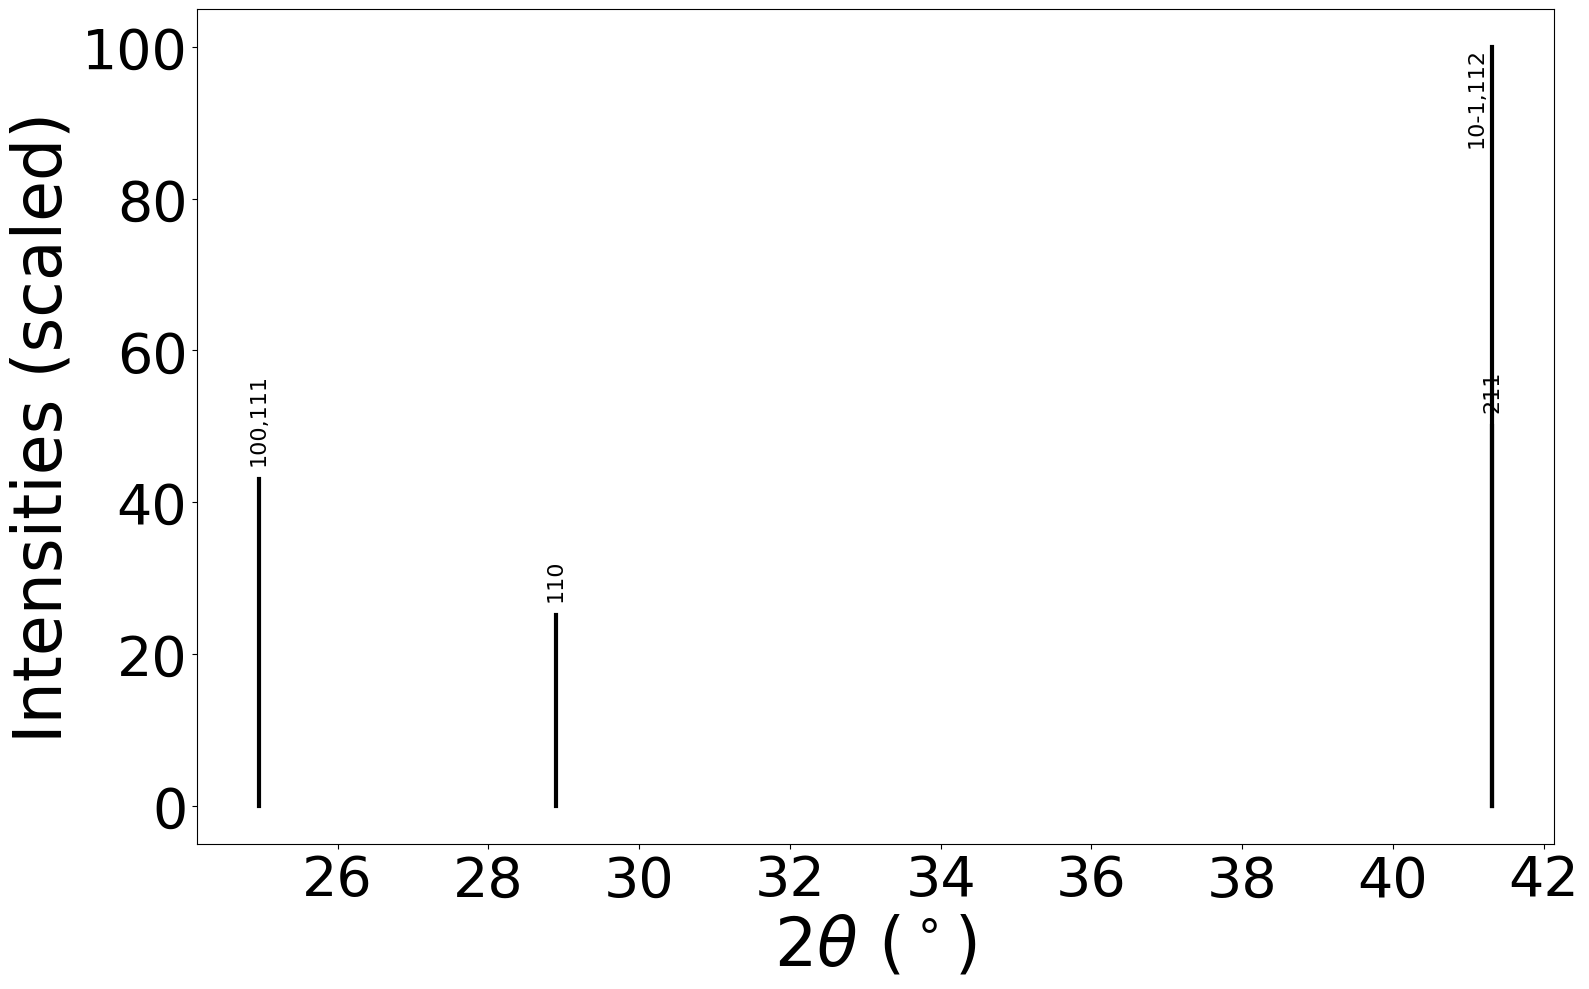

In [16]:
print("Intensité des trois premiers pics en fonction des angles pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å")
xrd.show_plot(prim_struc, two_theta_range=(0,45))